## Importing Necessary Libraries

In [1]:
# This is the top - level function that imports the libraries needed to generate the neural network. You can use this as a place holder
# Data manipulation libraries
import numpy as np
import pandas as pd

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# nmf
from sklearn.decomposition import NMF


#clustering Library
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors

# warnings
import warnings
warnings.filterwarnings(action = 'ignore')

## Uploading the Dataset

In [2]:
# Read Spotify data and return dataframe of spotify. xls. This is a temporary workaround until we have a better way
df = pd.read_csv('spotify.xls', index_col = 0)

In [3]:
# This is a wrapper around df. head () to avoid having to do it every time. The first call to head () returns a DataFrame
df.head()

,song_1,song_2,song_3,song_4,song_5,song_6,song_7,song_8,song_9,song_10,...,song_4991,song_4992,song_4993,song_4994,song_4995,song_4996,song_4997,song_4998,song_4999,song_5000
user_1,2,2,8,8,13,1,4,9,1,2,...,14,2,14,1,9,0,11,6,14,7
user_2,13,5,5,5,12,8,10,10,2,2,...,10,6,11,1,1,5,12,8,3,0
user_3,3,9,2,8,0,1,11,7,3,7,...,9,5,7,15,12,13,14,5,0,14
user_4,2,6,7,8,14,0,12,7,8,1,...,9,15,9,14,10,6,11,13,6,0
user_5,11,12,8,6,13,7,0,7,3,13,...,12,14,11,11,11,7,3,6,11,7


In [4]:
# Returns the shape of the data frame as a 2D array. This is useful for testing and to get the shape of a DataFrame
df.shape

(1000, 5000)

### We have to build recommendation engine using user listening history

In [5]:
# Returns an array of x - values. This is useful for testing and to see if there are any errors
x = df.values
x

array([[ 2,  2,  8, ...,  6, 14,  7],
       [13,  5,  5, ...,  8,  3,  0],
       [ 3,  9,  2, ...,  5,  0, 14],
       ...,
       [ 6,  2,  1, ..., 13,  6, 13],
       [ 7,  0,  8, ..., 11,  9, 12],
       [ 6, 15,  0, ..., 15,  4,  5]], dtype=int64)

## NMF - Non Negative Matrix Factorization

In [6]:
# This is a test to see if we can get rid of NMF. It's not a good idea
nmf = NMF(n_components = 100, max_iter = 1000, random_state = 3)
# n_components is genres in the dataset(features). In video that we watched (2 genres - comedy, action)
# we are considering 100 genres for the music
# max_iter is no. of iterations allowed(usually we keep it as no of users or no of rows)
# There are 1000 users in the data that's why we use max_iter = 1000

In [7]:
# Fit NMF to data. This is a wrapper for nmf. fit ( x ) where x is a 2D array
nmf.fit(x)

NMF(max_iter=1000, n_components=100, random_state=3)

In [8]:
# Transform x into user_matrix and store it in user_matrix. This is a wrapper around nmf. transform
user_matrix = nmf.transform(x)

In [9]:
user_matrix
# What do we have in user matrix - No of times user heard that particular song.
# every users rating for every genres
# genres are represented in column
# users are represented in rows

array([[1.59597279, 1.63144383, 0.        , ..., 0.        , 0.        ,
        0.08842005],
       [0.        , 1.37058116, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.25150672, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.86093206, ..., 0.        , 2.91063979,
        0.        ],
       [0.89111106, 0.55775866, 5.28815626, ..., 1.14447002, 0.        ,
        0.        ],
       [0.11437224, 0.3810454 , 1.17187612, ..., 0.        , 0.        ,
        0.        ]])

In [10]:
# This is called by user_matrix. fill () to fill the matrix with user data. It's a good place to do this
user_matrix.shape

(1000, 100)

In [11]:
song_matrix = nmf.components_.T
# In song matrix we will be having for every genre what is the rating of that particular song.

In [12]:
song_matrix
# what do we have in song matrix - How much rating is there in every genre for every song
# songs are represented by rows
# genres are represented by columns

array([[0.09154476, 0.02084876, 0.06170426, ..., 0.20525732, 0.02089963,
        0.42266527],
       [0.29410861, 0.        , 0.01635891, ..., 0.00535885, 0.25048781,
        0.28966942],
       [0.00182988, 0.16233797, 0.00882299, ..., 0.        , 0.0265591 ,
        0.15587654],
       ...,
       [0.37753494, 0.4043987 , 0.38341127, ..., 0.        , 0.49498818,
        0.        ],
       [0.        , 0.15106911, 0.        , ..., 0.34925875, 0.46747326,
        0.36724356],
       [0.09094906, 0.15572379, 0.        , ..., 0.30544496, 0.21424152,
        0.38353537]])

In [13]:
song_matrix.shape

(5000, 100)

## Steps for building recommendation system - Type 1 (for local library or small dataset)

1. Consider recommending songs for the first user(row location zero in user matrix)
2. Find the euclidean distance between the first user and the other 999 users.
3. Find out top 10 songs heard by nearest 5 users
4. Recommend this 10 songs to the first user.

## Calculating the distance between two users

In [14]:
def col_dist(u1, u2):
    return pow(sum(pow(u1[x] - u2[x], 2) for x in range (len(u1))), 0.5)

In [15]:
col_dist(user_matrix[0], user_matrix[1])

17.066386601804

In [16]:
def distance_from_remaining_users(buser, user_matrix):
    # B user - Base user( means from which we are calculating distance to other users)
    dist = []
    for i in range(len(user_matrix)):
        if buser != i:
            # if buser and i becomes same then that means we are calculating distance from base user to the base user which is 0 and doesn't make any sense.
            dist.append(col_dist(user_matrix[buser], user_matrix[i]))
    return dist

In [17]:
dist_user1 = distance_from_remaining_users(0, user_matrix)

In [18]:
dist_user1

[17.066386601804,
 15.356075621066994,
 15.86062659762292,
 15.08547803800148,
 13.844410784412421,
 14.93830499505821,
 13.250608548190929,
 16.848370110196658,
 15.146562759829749,
 15.085160716501182,
 15.426113947102701,
 15.162198320323787,
 8.915369316562089,
 16.067019686574866,
 14.19287618270617,
 12.163103730463444,
 15.342023559303357,
 15.107063798224862,
 12.39826262645948,
 13.014577302501554,
 15.55835100947823,
 15.606333530988234,
 16.15773243643213,
 16.372436321518524,
 15.74256223157576,
 15.287379337133213,
 14.678932332433101,
 13.958180490385383,
 16.35376862945872,
 16.167950463626763,
 15.592805869973704,
 15.300255567714363,
 14.81345827653785,
 14.672279075595167,
 14.966327527262756,
 14.957592291660246,
 15.289917565626205,
 15.751052101105245,
 15.536270214046864,
 13.989176492718359,
 15.584294899619525,
 14.422344103504894,
 14.029914555522152,
 14.49861324426234,
 15.124960994479293,
 14.030779564859593,
 12.413550520509116,
 14.918957038204304,
 13.491

## Distance of first user w.r.t each user

In [19]:
len(dist_user1)

999

In [20]:
# Now how we will get to know which is the min distance from user 0?

## Finding nearest 5 users

In [21]:
# Let's say 8.91 is the smallest number out of this list, so we want the index no of 8.91 (which user it is representing)
nearest_users = np.argsort(dist_user1)[:5]

In [22]:
for i in range(len(nearest_users)):
    nearest_users[i]+=1
nearest_users

# these are the first five users

array([ 13, 614, 666, 914, 395], dtype=int64)

In [23]:
for i in nearest_users:
    print('songs heard by user', i , 'are :')
    temp = df.iloc[i]
    print(temp[temp.values != 0].index)

songs heard by user 13 are :
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_6', 'song_7', 'song_8',
       'song_9', 'song_10', 'song_13',
       ...
       'song_4989', 'song_4990', 'song_4991', 'song_4992', 'song_4993',
       'song_4994', 'song_4995', 'song_4997', 'song_4998', 'song_5000'],
      dtype='object', length=4687)
songs heard by user 614 are :
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_9', 'song_10',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', length=4686)
songs heard by user 666 are :
Index(['song_1', 'song_2', 'song_3', 'song_4', 'song_5', 'song_6', 'song_7',
       'song_8', 'song_9', 'song_10',
       ...
       'song_4991', 'song_4992', 'song_4993', 'song_4994', 'song_4995',
       'song_4996', 'song_4997', 'song_4998', 'song_4999', 'song_5000'],
      dtype='object', lengt

## Finding out top 10 songs from above list of songs

In [24]:
def topNsongs(nearest_users, df, N):
    temp = df.iloc[nearest_users]
    dict1 = temp.max().to_dict()
    
    #print(dict1)
    
    # converting every key value pair into a tuple and swapping them for sorting purpose, end result is a list of song
    # and number of times heard tuple
    
    sorted_dict = sorted(dict1.items(), key = lambda keyvalue: (keyvalue[1], keyvalue[0]), reverse = True)[:N]
    
    #print(sorted_dict)
    return [x[0] for x in sorted_dict]

In [25]:
topNsongs(nearest_users, df, 15)

['song_998',
 'song_990',
 'song_99',
 'song_988',
 'song_987',
 'song_986',
 'song_985',
 'song_982',
 'song_979',
 'song_968',
 'song_96',
 'song_958',
 'song_951',
 'song_95',
 'song_949']

### Initially my dictionary was like this{song 1:12, song2:5, song3:8}, after swapping it became like this and then i can easily sort that dictionary because now i have numbers in it

### keyvalue is a keyword, we have converted that into tuple by using round bracket and sqaure bracket 1 will be in position 1, and square bracket 0 will be in 1st position, swapping the position.

### this everything will get stored in key-named tuple.

## Type 2 Recommendation system for larger datasets

- K-means Clustering

In [26]:
# to decide value of k which method do we use?
# Elbow method

In [27]:
WCSS = {}
for k in range(1,50):
    kmeans = KMeans(n_clusters = k , max_iter = 1000).fit(song_matrix)
    WCSS[k] = kmeans.inertia_
    
# Inertia - how well a dataset was clustered by kmeans
## wcss = within cluster sum of squares

In [28]:
WCSS

{1: 14072.226800845132,
 2: 13901.172827662562,
 3: 13774.020232137427,
 4: 13672.184979835722,
 5: 13593.29180270567,
 6: 13519.748647202425,
 7: 13456.796112350723,
 8: 13401.270807396922,
 9: 13348.923388309911,
 10: 13311.27502088671,
 11: 13271.615346578477,
 12: 13231.765647360822,
 13: 13190.909287941671,
 14: 13170.068266075901,
 15: 13154.195032261034,
 16: 13129.96038275904,
 17: 13098.771043743764,
 18: 13083.643798141173,
 19: 13059.872346639944,
 20: 13037.068767350649,
 21: 13016.017681740237,
 22: 13009.17113241888,
 23: 12979.164049532948,
 24: 12971.122984786798,
 25: 12955.572762264765,
 26: 12933.328069420877,
 27: 12928.924715314537,
 28: 12897.754099551614,
 29: 12886.2157561796,
 30: 12880.17195804571,
 31: 12862.355861363538,
 32: 12854.442703637567,
 33: 12836.988436723008,
 34: 12822.563840979506,
 35: 12810.173386040573,
 36: 12807.142955063138,
 37: 12788.934437149699,
 38: 12776.793598580483,
 39: 12767.21856106185,
 40: 12755.86624482076,
 41: 12739.7668837

### Initailly we had k=1 , this is the sum of squared  distances between each data point and centroid of the cluster, simolarly we are increasing value og k, then sum of squared distance is decreasing

Text(0, 0.5, 'WCSS')

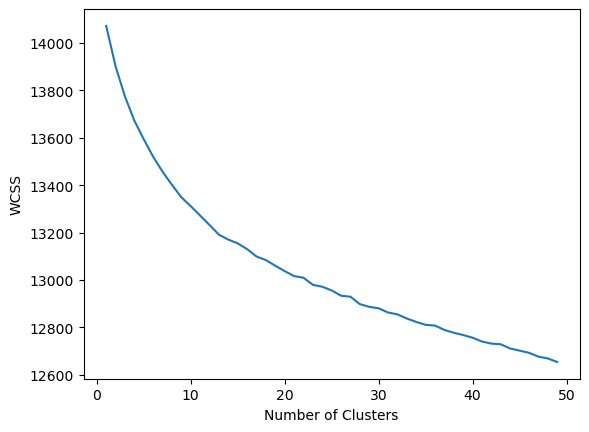

In [29]:
plt.plot(WCSS.keys() , WCSS.values())
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

## optimal no of clusters - 15

In [30]:
def songs_in_cluster(N_clusters , df , song_matrix , song_name , n_recommendations):
    kmeans = KMeans(n_clusters = N_clusters , max_iter = 1000).fit(song_matrix)
    index_in_song = df.columns.to_list().index(song_name)
    
    song_vector = song_matrix[index_in_song]
    
    all_songs_in_cluster = kmeans.predict(song_matrix)
    #print(len(all_songs_in_cluster))
    
    
    #finding songs which belongs to same cluster as of songs passed in song name
    
    song_in_selected_cluster = [x for x in range (len(all_songs_in_cluster))
                               if all_songs_in_cluster[x] == kmeans.predict([song_vector])]
    
    
    song_cluster = song_matrix[song_in_selected_cluster]
    
    
    neighbors = NearestNeighbors(n_neighbors = n_recommendations)
    
    
    neighbors.fit(song_cluster)
    
    recommended_songs = neighbors.kneighbors([song_matrix[index_in_song]])
    
    #print(recommended_songs[1][0])
    
    
    
    
    
    songs = df.columns
    return [songs[x] for x in recommended_songs [1][0]]
    
    

df.columns.to_list() - we have converted df.columns into a list

## song_matrix[48] gives 100 genre score for 48th song

5000 songs in a 5000 clusters.

In [31]:
songs_in_cluster(15, df, song_matrix , 'song_5' , 5)

['song_2', 'song_279', 'song_267', 'song_213', 'song_174']